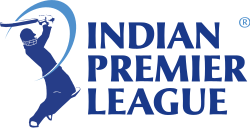

# EDA on the Indian Premier League (2008-2023)

## The Indian Premier League (IPL) is a men's Twenty20 (T20) cricket league that is annually held in India and contested by ten city-based franchise teams. The BCCI founded the league in 2007. The competition is usually held in summer between March and May every year. The IPL is the most-popular cricket league in the world

## This EDA is divided into 2 parts. We'll first look at team anlyisis and then move to individual player analysis. The source data is derived from Kaggle.

In [52]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

## Adding 2023 matches to the master data.

### The original file from Kaggle did not have the match data for IPL 2023. New data was downloaded from a cricket data repository. Some data prep was needed before adding this data to the original file.

In [42]:
#Selecting only the files for IPL 2023 as the downloaded data had all seasons data.

import os
import csv

folder_path = r"C:\Users\naveen.sequeira\Downloads\ipl_csv2"
start_number = 1359475
end_number = 1370353


files = []

for number in range(start_number, end_number + 1):
    file_name = str(number) + "_info.csv"
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path):
        files.append(file_path)

In [ ]:
#The combined files were then concatenated vertically. 
#But the combined files had an issue. They had team and umpire repeating twice.
#So I had to write some code to rename them as team1, team2, umpire1 and umpire2


lst = pd.DataFrame()


for file in files:
    print(file)
    match_id = file.split("\\")[-1].split("_")[0]
    df = pd.read_csv(file, skiprows=1, usecols=[1,2], header=None, names=["info_", "data"])\
         .query("info_ not in ['player', 'registry']")\
         .append({"info_": "matchId", "data": match_id}, ignore_index=True)
    
    duplicate_list = df.info_.duplicated(keep=False)
    
    team_duplicates_count = 1
    umpire_duplicates_count = 1

    for index, is_duplicate in enumerate(duplicate_list):
        if is_duplicate:
            if df.loc[index, "info_"] == "team":
                df.loc[index, "info_"] = f"team{team_duplicates_count}"
                team_duplicates_count += 1
            elif df.loc[index, "info_"] == "umpire":
                df.loc[index, "info_"] = f"umpire{umpire_duplicates_count}"
                umpire_duplicates_count += 1
    
    df = df.set_index("info_")
    
    lst = pd.concat([lst, df], axis=1)

In [ ]:
#Converting the dataframe from long format to wide format
lst = lst.T.reset_index(drop=True).rename_axis(None, axis=1)

In [ ]:
#Append 2023 data to the master data and save it
matches = matches.append(lst)
matches.to_csv("matches_updated_mens_ipl_2023.csv", index=False)

## The data for the EDA comes from two csv files. One file consists only match related information and another file contains ball by ball data. We'll explore team analysis using the match data


## Intial exploration and data cleaning

In [22]:
matches = pd.read_csv("matches_updated_mens_ipl_2023.csv")

In [23]:
matches.head()

,event,date,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,neutralvenue,venue,method,toss_decision,city,winner,umpire1,match_number,eliminator,winner_wickets,matchId,gender,reserve_umpire,tv_umpire,outcome
0,Indian Premier League,05-04-2017 00:00,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591,NaN,NaN,NaN,NaN
1,Indian Premier League,06-04-2017 00:00,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,Mumbai Indians,NaN,6,SPD Smith,NaN,Maharashtra Cricket Association Stadium,NaN,field,Pune,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,1082592,NaN,NaN,NaN,NaN
2,Indian Premier League,07-04-2017 00:00,Gujarat Lions,Kolkata Knight Riders,CK Nandan,V Narayan Kutty,2017,Kolkata Knight Riders,NaN,6,CA Lynn,NaN,Saurashtra Cricket Association Stadium,NaN,field,Rajkot,Kolkata Knight Riders,Nitin Menon,3.0,NaN,10.0,1082593,NaN,NaN,NaN,NaN
3,Indian Premier League,08-04-2017 00:00,Kings XI Punjab,Kings XI Punjab,C Shamshuddin,Chinmay Sharma,2017,Rising Pune Supergiant,NaN,6,GJ Maxwell,NaN,Holkar Cricket Stadium,NaN,field,Indore,Kings XI Punjab,AK Chaudhary,4.0,NaN,6.0,1082594,NaN,NaN,NaN,NaN
4,Indian Premier League,08-04-2017 00:00,Royal Challengers Bangalore,Royal Challengers Bangalore,VK Sharma,J Srinath,2017,Delhi Daredevils,15.0,6,KM Jadhav,NaN,M.Chinnaswamy Stadium,NaN,bat,Bengaluru,Royal Challengers Bangalore,S Ravi,5.0,NaN,NaN,1082595,NaN,NaN,NaN,NaN


In [24]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event            1098 non-null   object 
 1   date             1098 non-null   object 
 2   team1            1098 non-null   object 
 3   toss_winner      1098 non-null   object 
 4   umpire2          1098 non-null   object 
 5   match_referee    1098 non-null   object 
 6   season           1098 non-null   int64  
 7   team2            1098 non-null   object 
 8   winner_runs      503 non-null    float64
 9   balls_per_over   1098 non-null   int64  
 10  player_of_match  1092 non-null   object 
 11  neutralvenue     77 non-null     object 
 12  venue            1098 non-null   object 
 13  method           20 non-null     object 
 14  toss_decision    1098 non-null   object 
 15  city             1047 non-null   object 
 16  winner           1078 non-null   object 
 17  umpire1       

In [25]:
matches.describe()

,season,winner_runs,balls_per_over,match_number,winner_wickets,matchId
count,1098.000000,503.000000,1098.0,1032.000000,575.000000,1.098000e+03
mean,2016.080146,30.125249,6.0,31.535853,6.180870,9.018717e+05
std,4.855707,26.853784,0.0,18.416685,1.841824,3.623810e+05
min,2008.000000,1.000000,6.0,1.000000,1.000000,3.359820e+05
25%,2012.000000,10.500000,6.0,16.000000,5.000000,5.483322e+05
50%,2016.000000,22.000000,6.0,31.000000,6.000000,9.809640e+05
75%,2021.000000,41.500000,6.0,46.000000,7.000000,1.254065e+06
max,2023.000000,146.000000,6.0,72.000000,10.000000,1.370353e+06


In [26]:
# Drop unwanted columns
unwanted_cols = ["outcome", "gender", "reserve_umpire","tv_umpire"]
matches = matches.drop(columns=unwanted_cols)

In [27]:
#Change date columns to correct format
matches.date  = matches.date.astype("datetime64")

In [28]:
np.sort(matches.season.unique())

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023], dtype=int64)

In [29]:
#Correct different names for Rising Pune Supergiant
# First find all columns where the wrong name exists and then change it
value_exists = matches.isin(["Rising Pune Supergiants"]).any()
value_exists[value_exists].index.tolist()
matches[['team1', 'toss_winner', 'team2', 'winner']] = matches[['team1', 'toss_winner', 'team2', 'winner']].replace(
    "Rising Pune Supergiants", "Rising Pune Supergiant"
    )

In [30]:
#Adjust for changed team names
name_changes = {
    "Delhi Daredevils": "Delhi Capitals",
    "Kings XI Punjab": "Punjab Kings"
}
matches[['team1', 'toss_winner', 'team2', 'winner']] = matches[['team1', 'toss_winner', 'team2', 'winner']].replace(
    name_changes
)

In [33]:
# shorten team names for convenience
team_names = np.unique([matches.team1, matches.team2]).tolist()
short_names = ["".join([name[0] for name in name.split()]) for name in team_names]
shortened_names = dict(zip(team_names, short_names))
shortened_names["Deccan Chargers"] = "DCH"
shortened_names["Sunrisers Hyderabad"] = "SRH"
shortened_names

{'Chennai Super Kings': 'CSK',
 'Deccan Chargers': 'DCH',
 'Delhi Capitals': 'DC',
 'Gujarat Lions': 'GL',
 'Gujarat Titans': 'GT',
 'Kochi Tuskers Kerala': 'KTK',
 'Kolkata Knight Riders': 'KKR',
 'Lucknow Super Giants': 'LSG',
 'Mumbai Indians': 'MI',
 'Pune Warriors': 'PW',
 'Punjab Kings': 'PK',
 'Rajasthan Royals': 'RR',
 'Rising Pune Supergiant': 'RPS',
 'Royal Challengers Bangalore': 'RCB',
 'Sunrisers Hyderabad': 'SRH'}

In [34]:
matches[['team1', 'toss_winner', 'team2', 'winner']] = matches[['team1', 'toss_winner', 'team2', 'winner']].replace(
    shortened_names
)

In [35]:
#defunct teams
defunct_teams = ["GL", "DCH", "KTK", "PW", "RPS"]

## Now that we have everything ready, let's dive into to all the IPL stats

### Who won the most matches?

In [37]:
pd.DataFrame({
    "Matches":matches.groupby("team1").team1.count() + matches.groupby("team2").team2.count(),
    "Matches_Won": matches.groupby("winner").winner.count()
})\
.assign(Win_pct=lambda x: (x.Matches_Won / x.Matches).round(2))\
.drop(defunct_teams)\
.sort_values("Win_pct", ascending=False)

,Matches,Matches_Won,Win_pct
GT,50,34,0.68
CSK,240,141,0.59
LSG,45,25,0.56
MI,263,147,0.56
KKR,251,125,0.50
RR,220,108,0.49
RCB,254,121,0.48
SRH,180,82,0.46
PK,246,110,0.45
DC,252,110,0.44


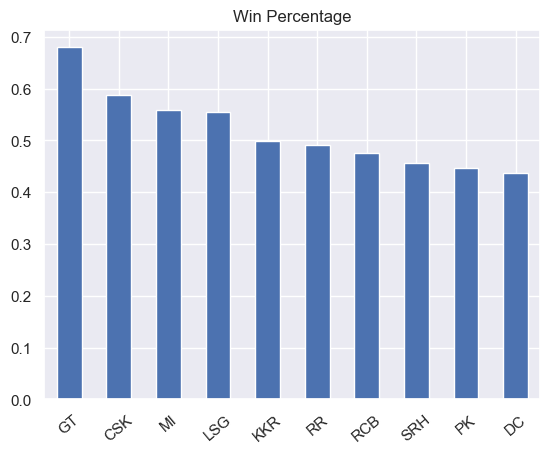

In [320]:
(
matches.groupby("winner").winner.count() / 
(matches.groupby("team1").team1.count() + matches.groupby("team2").team2.count())
)\
.drop(defunct_teams)\
.sort_values(ascending=False).plot(kind="bar")
plt.title("Win Percentage")
plt.xticks(rotation=40)
plt.xlabel("")
plt.savefig("win_pct.svg");

### Toss Factor

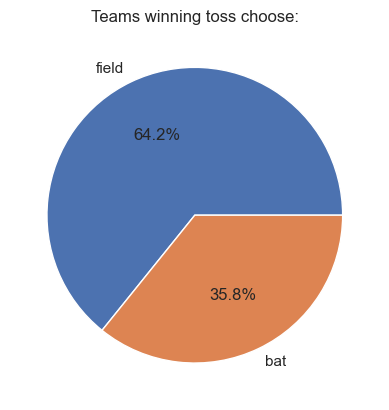

In [322]:
matches.toss_decision.value_counts()\
.plot(kind="pie", autopct='%1.1f%%')
plt.title("Teams winning toss choose:")
plt.axis("off")
plt.xlabel("");

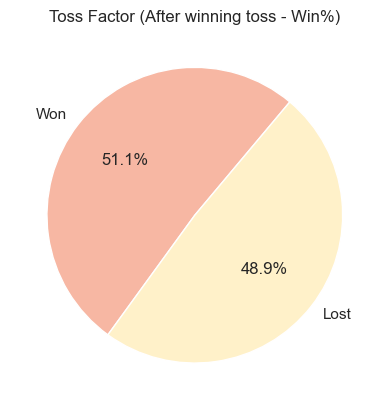

In [323]:
pd.Series(
          [matches[matches.toss_winner == matches.winner].winner.count(),
           matches[matches.toss_winner != matches.winner].winner.count()],
           index=["Won", "Lost"], name=""
).plot.pie(autopct='%1.1f%%',  startangle=50, colors=[ "#F7B7A3","#FFF1C9"])
plt.title("Toss Factor (After winning toss - Win%)");

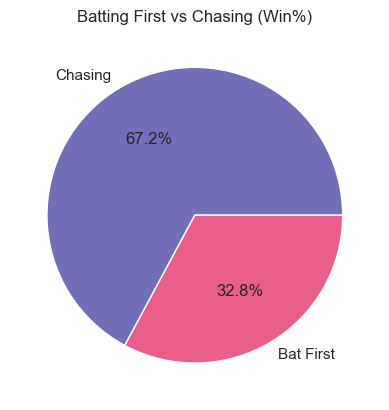

In [324]:
pd.Series(
    [matches.query("toss_decision=='field' and winner_wickets == winner_wickets").winner.count(),
     matches.query("toss_decision=='bat' and winner_runs == winner_runs").winner.count()],
     index=["Chasing", "Bat First"], name="")\
.plot.pie(autopct='%1.1f%%', colors=["#726FB8",  "#EA5F89"])
plt.title("Batting First vs Chasing (Win%)");

### Most Player Of the Match Awards

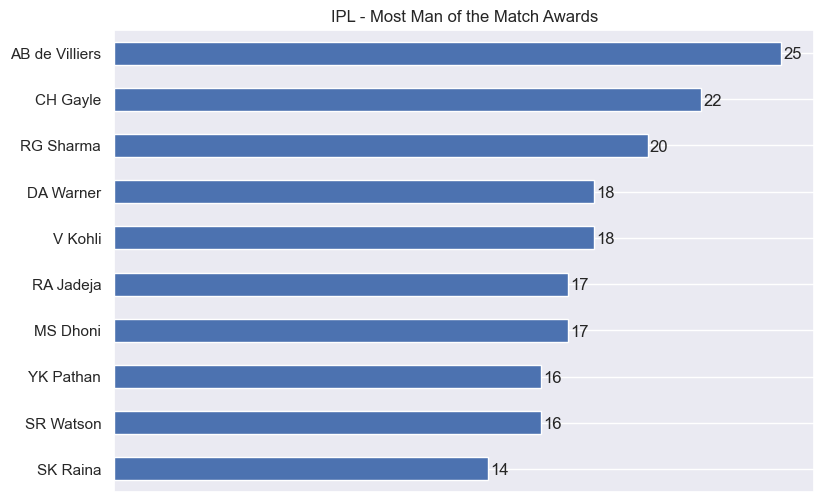

In [333]:
matches.player_of_match.value_counts().nlargest(10).sort_values().plot.barh(figsize=(10,6))
a = matches.player_of_match.value_counts().nlargest(10).sort_values()
for i, value in enumerate(a):
    plt.text(value+0.08, i, str(round(value)), ha="left", va="center_baseline")
plt.xticks([])
plt.title("IPL - Most Man of the Match Awards")
plt.subplots_adjust(left=0.2);

### Some stats on the match officials

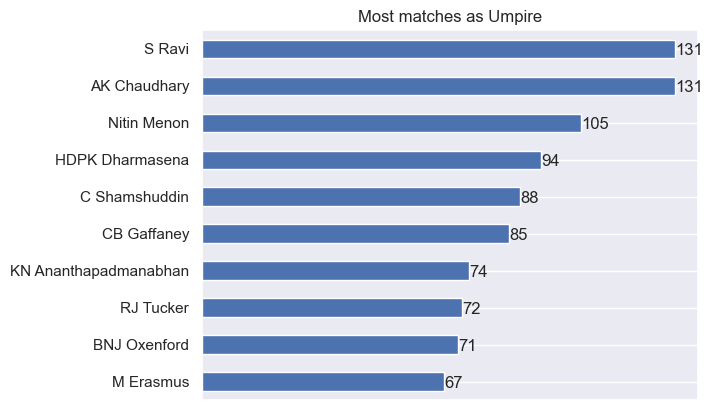

In [44]:
matches.umpire1.value_counts().add(matches.umpire2.value_counts(), fill_value=0).nlargest(10).sort_values().plot.barh()
a = matches.umpire1.value_counts().add(matches.umpire2.value_counts(), fill_value=0).nlargest(10).sort_values()
plt.title("Most matches as Umpire")
plt.xticks([])
for i, value in enumerate(a):
    plt.text(value+0.08, i, str(round(value)), ha="left", va="center_baseline");

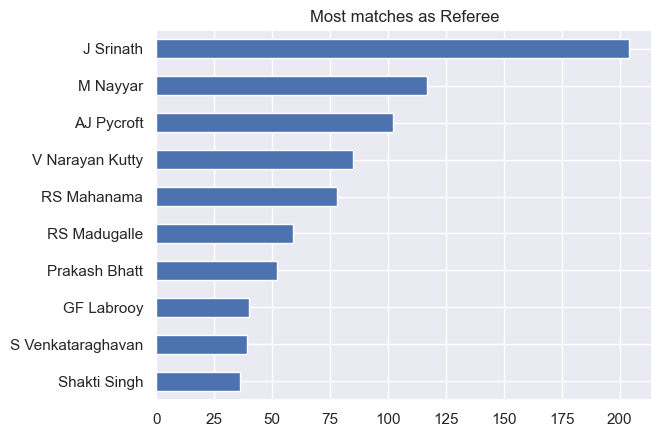

In [46]:
matches.match_referee.value_counts().nlargest(10).sort_values().plot.barh()
plt.title("Most matches as Referee");

### City with Most Matches

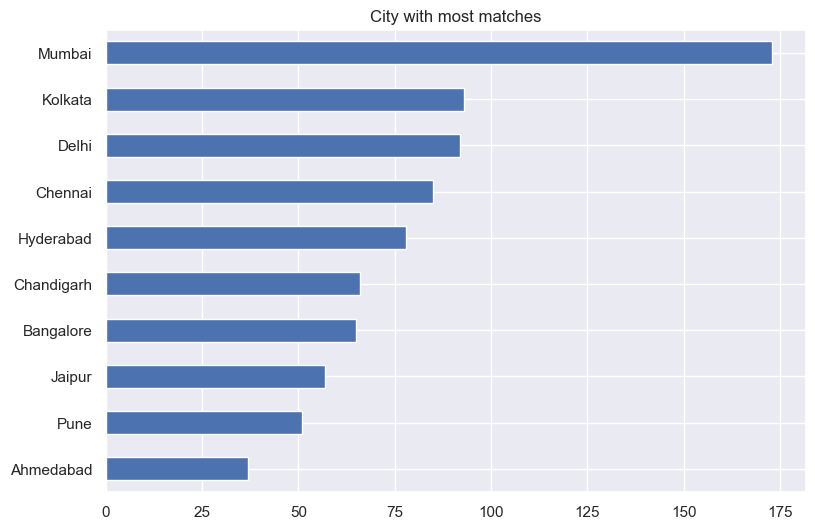

In [337]:
matches.city.value_counts().nlargest(10).sort_values().plot.barh(figsize=(10,6))
plt.title("City with most matches")
plt.subplots_adjust(left=0.2)
plt.savefig("city_mostMatches.svg");

### Points Table - All Seasons

In [13]:
points_table = pd.read_html("https://www.cricketwa.com/pointstable/indian-premier-league.aspx")[1]

In [14]:
points_table = points_table.drop(["Rank", "AVG"], axis=1).replace("-", np.nan)

In [15]:
points_table.iloc[:, 1:] = points_table.iloc[:, 1:].astype(float)

In [17]:
points_table.to_excel("ipl_allSeasons_pointsTable.xlsx", index=False)

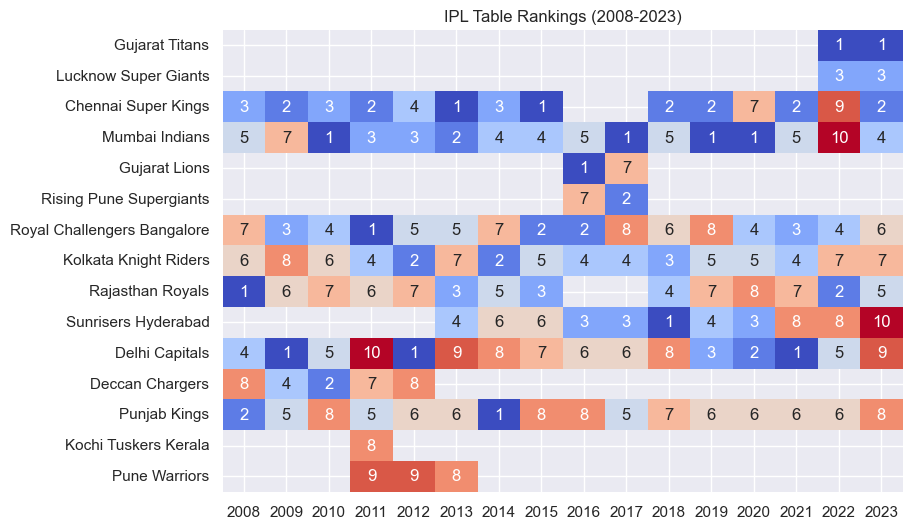

In [265]:
# A Seaborn Heatmap was used create the ranking table

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(points_table.set_index("Team").sort_index(axis=1),
            annot=True, cmap='coolwarm', cbar=False,)

# Customize the chart
plt.ylabel(None)
plt.title('IPL Table Rankings (2008-2023)')
plt.subplots_adjust(left=0.22)
plt.savefig("team_rank.png")

## Player Analysis

In [48]:
players = pd.read_csv("IPL_ball_by_ball_updated.csv", parse_dates=["start_date"])

In [49]:
players

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243810,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.2,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243811,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.3,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243812,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.4,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243813,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.5,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243815 entries, 0 to 243814
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   match_id                243815 non-null  int64         
 1   season                  243815 non-null  int64         
 2   start_date              243815 non-null  datetime64[ns]
 3   venue                   243815 non-null  object        
 4   innings                 243815 non-null  int64         
 5   ball                    243815 non-null  float64       
 6   batting_team            243815 non-null  object        
 7   bowling_team            243815 non-null  object        
 8   striker                 243815 non-null  object        
 9   non_striker             243815 non-null  object        
 10  bowler                  243815 non-null  object        
 11  runs_off_bat            243815 non-null  int64         
 12  extras                  243815

In [ ]:
# Remove unnecessary columns
players = players.drop(["other_wicket_type", "other_player_dismissed"], axis=1)

In [190]:
players.describe()

,match_id,season,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty
count,2.438150e+05,243815.000000,243815.000000,243815.000000,243815.000000,243815.000000,7652.000000,1018.000000,628.000000,3778.000000,2.0
mean,8.707326e+05,2015.611119,1.483781,9.557662,1.252614,0.067174,1.204260,1.034381,1.867834,1.304129,5.0
std,3.532362e+05,4.650281,0.502855,5.686347,1.626764,0.341990,0.788406,0.325568,1.312454,0.847922,0.0
min,3.359820e+05,2008.000000,1.000000,0.100000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
25%,5.483160e+05,2012.000000,1.000000,4.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
50%,8.298190e+05,2015.000000,1.000000,9.400000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
75%,1.216507e+06,2020.000000,2.000000,14.400000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0
max,1.370353e+06,2023.000000,6.000000,19.900000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0


## Batting stats

### Most Runs

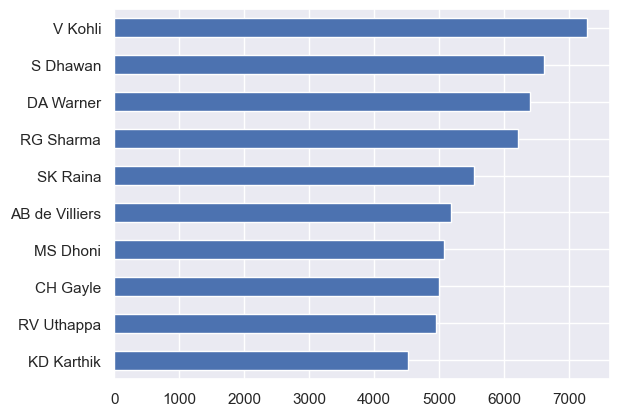

In [246]:
players.groupby("striker").runs_off_bat.sum().nlargest(10).sort_values()\
.plot.barh()
plt.ylabel(None);

### Most Centuries

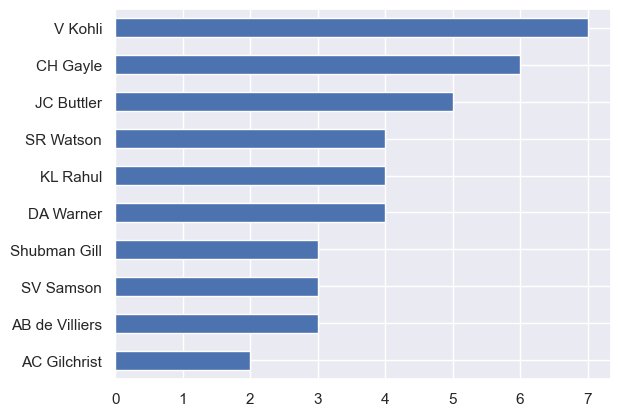

In [388]:
players.groupby(["match_id","striker"], as_index=False).runs_off_bat.sum()\
.query("runs_off_bat >= 100")\
.groupby("striker").striker.count().nlargest(10).sort_values()\
.plot.barh()
plt.ylabel(None);

### To omit outliers we'll use a qualification of min 200 balls faced for most of our remaining stats. We'll use this qualification to filter our results.

In [173]:
above_200_balls = players.groupby("striker").ball.count()\
[lambda x: x>=200].index.to_list()
qualifiers = lambda x: x.index.isin(above_200_balls)

### Highest Averages

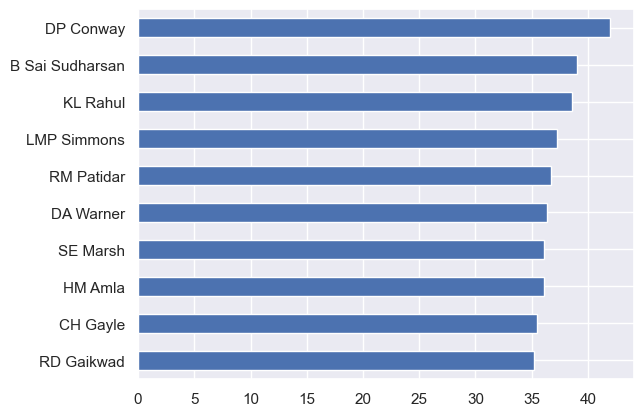

In [193]:
players.groupby("striker").runs_off_bat.sum()\
[qualifiers]\
.div(players.groupby("striker").match_id.nunique()
     [qualifiers])\
.nlargest(10).sort_values()\
.plot.barh()
plt.ylabel(None);

### Highest Stike Rate

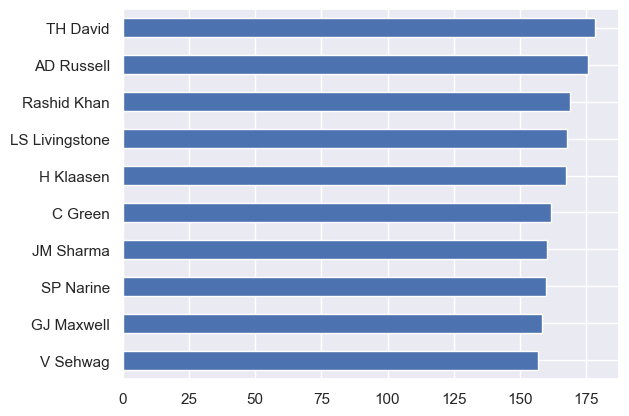

In [175]:
# We have to exclude the wides and noballs to get the exact strike rate
players.groupby("striker").runs_off_bat.sum()\
[qualifiers]\
.div(players.query("wides != wides and noballs != noballs")
     .groupby("striker").ball.count()
     [qualifiers]).mul(100)\
.nlargest(10).sort_values()\
.plot.barh()
plt.ylabel(None);

### Best in the Business - Batters with a good average and high strike rate 

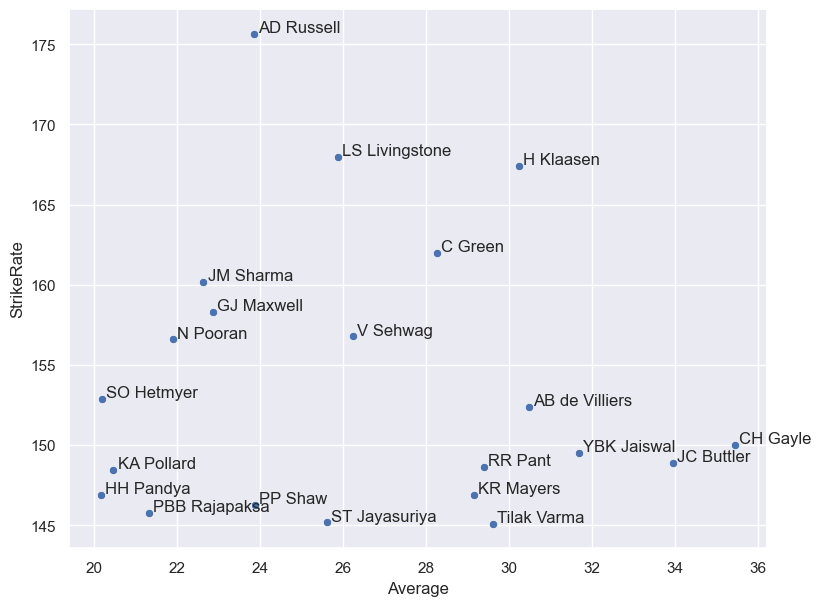

In [386]:
avg = players.groupby("striker").runs_off_bat.sum()\
[qualifiers]\
.div(players.groupby("striker").match_id.nunique()
     [qualifiers])
sr = players.groupby("striker").runs_off_bat.sum()\
[qualifiers]\
.div(players.query("wides != wides and noballs != noballs")
     .groupby("striker").ball.count()
     [qualifiers]).mul(100)

avg_sr = pd.DataFrame({"Average": avg, "StrikeRate": sr}).query("Average >= 20 and StrikeRate >= 145")

plt.figure(figsize=(9,5))
ax = sns.scatterplot(x="Average", y="StrikeRate", data=avg_sr)

for i, row in avg_sr.iterrows():
    ax.text(row["Average"]+0.1, row["StrikeRate"]+0.1, i);

### Most sixes

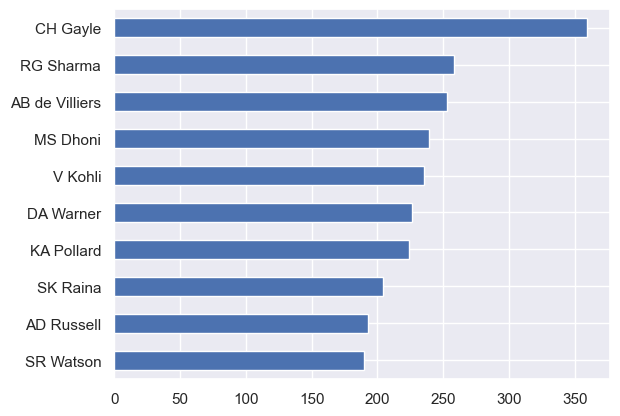

In [194]:
players.query("runs_off_bat == 6")\
.groupby("striker").runs_off_bat.count()\
.nlargest(10).sort_values()\
.plot.barh()
plt.ylabel(None);

### Sixes Per Innings

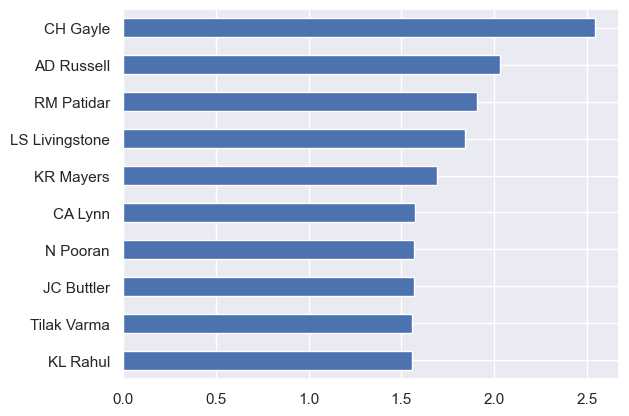

In [197]:
players.query("runs_off_bat == 6")\
.groupby("striker").runs_off_bat.count()\
[qualifiers]\
.div(players.groupby("striker").match_id.nunique()
     [qualifiers])\
.nlargest(10).sort_values()\
.plot.barh()
plt.ylabel(None);

### Most Sixes in an Innings

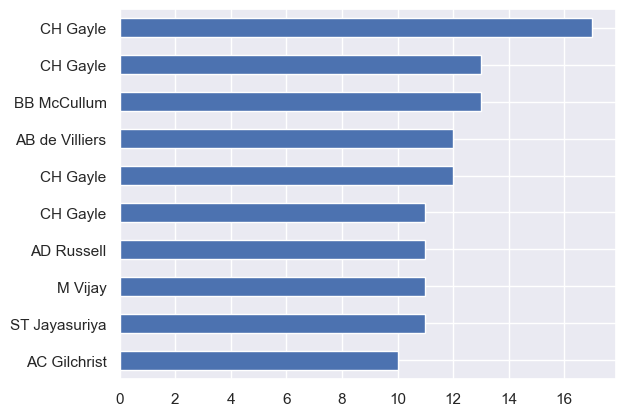

In [245]:
players.query("runs_off_bat == 6")\
.groupby(["match_id", "striker"], as_index=False).runs_off_bat.count()\
.iloc[:, 1:].nlargest(10, "runs_off_bat")\
.set_index("striker").sort_values("runs_off_bat")\
.plot.barh(legend=False)
plt.ylabel(None);

### An interesting stat - Least deliveries per six

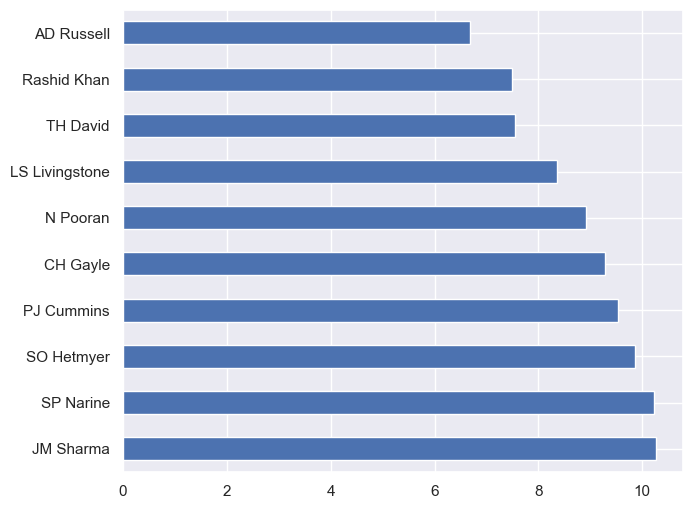

In [177]:
players.query("wides != wides and noballs != noballs")\
.groupby("striker").ball.count()\
[qualifiers]\
.div(players.query("runs_off_bat == 6")\
     .groupby("striker").runs_off_bat.count()
     [qualifiers])\
.nsmallest(10).sort_values(ascending=False)\
.plot.barh(legend=False, figsize=(8,6))
plt.subplots_adjust(left=0.2)
plt.ylabel(None);
# plt.title("Least per six across all IPL Seasons\n"
# "Lower the better (Qualification: Balls faced ≥200)");

#### It takes Andre Russell less than 7 balls to hit his first 6.

### Most fours

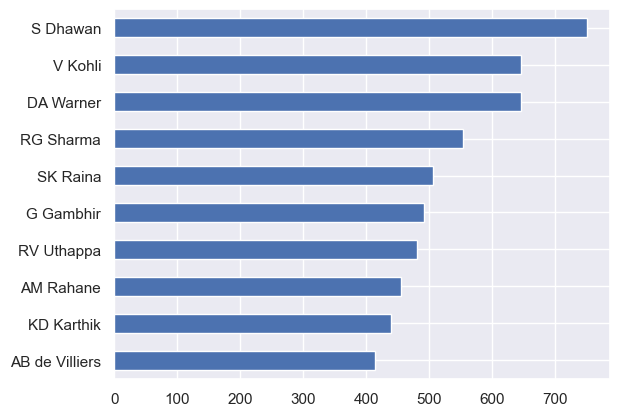

In [124]:
players.query("runs_off_bat == 4")\
.groupby("striker").runs_off_bat.count()\
.nlargest(10).sort_values()\
.plot.barh()
plt.ylabel(None);

### Most Boundaries (4s and 6s)

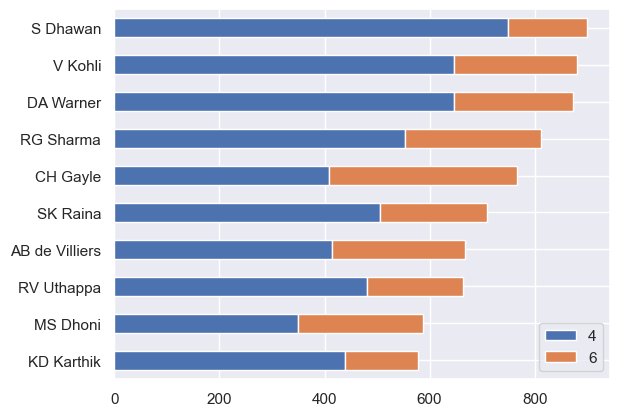

In [358]:
players.query("runs_off_bat in [6,4]")\
.groupby(["striker", "runs_off_bat"]).ball.count().unstack()\
.assign(Total= lambda x: x[4] + x[6]).nlargest(10, "Total").sort_values("Total").drop(columns="Total")\
.plot(kind="barh", stacked=True)
plt.ylabel(None)
plt.legend();

### Highest Boundary Percentage

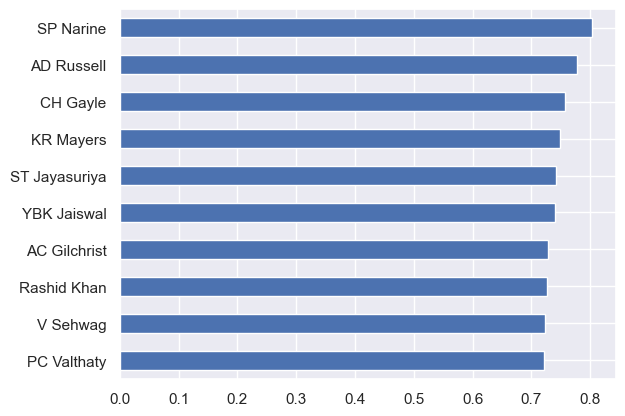

In [176]:
(
players.query("runs_off_bat in [6,4]")
.groupby("striker").runs_off_bat.sum()
[qualifiers]
.div(players.groupby("striker").runs_off_bat.sum()
     [qualifiers])
.nlargest(10).sort_values()
.plot.barh()
)
plt.ylabel(None);

#### Sunil Narine scores 80% of his runs in boundaries